# Finger count recognition PROJECT

**Recognition of the number of fingers shown using neural networks**

**Author: Andrii Kobyliuk**

**Import Libaries**

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import h5py

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

import random
import os

**Show Input Files**

In [76]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/finger-n/Test.h5
/kaggle/input/finger-n/sample_submission.csv
/kaggle/input/finger-n/Train.h5


# **Read Train.h5**

In [77]:
train = h5py.File('../input/finger-n/Train.h5', 'r')
list(train)

['list_classes', 'train_set_x', 'train_set_y']

In [78]:
train_set_x = train.get('train_set_x')
train_set_x

<HDF5 dataset "train_set_x": shape (1080, 64, 64, 3), type "|u1">

In [79]:
x_train = np.array(train_set_x)
x_train.shape

(1080, 64, 64, 3)

In [80]:
train_set_y = train.get('train_set_y')
train_set_y

<HDF5 dataset "train_set_y": shape (1080,), type "<i8">

In [81]:
y_train = np.array(train_set_y)
y_train.shape

(1080,)

**View Some Train Image Samples**

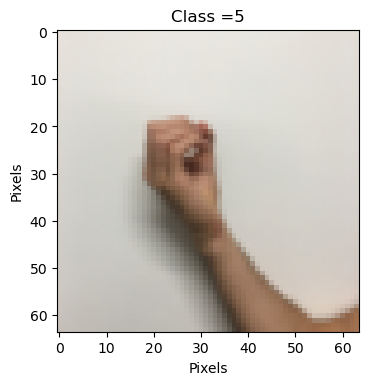

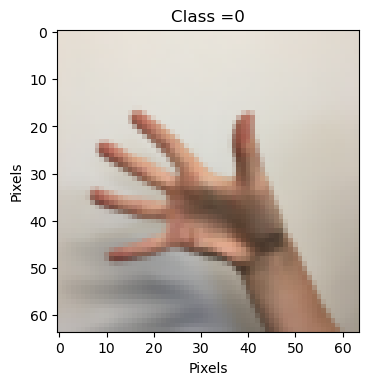

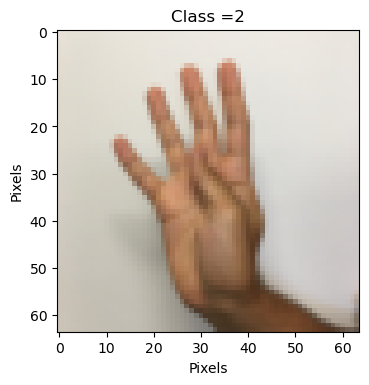

In [82]:
for i in range(3):
    fig = plt.figure(dpi=100)
    plt.imshow(x_train[random.randint(0, y_train.shape[0]-1)][:])
    plt.title(f"Class ={y_train[i]}")
    plt.ylabel("Pixels")
    plt.xlabel("Pixels")
    plt.show()

# **Read Test.h5**

In [83]:
test = h5py.File('../input/finger-n/Test.h5', 'r')
list(test)

['list_classes', 'test_set_x']

In [84]:
test_set_x = test.get('test_set_x')
test_set_x

<HDF5 dataset "test_set_x": shape (120, 64, 64, 3), type "|u1">

In [85]:
x_test = np.array(test_set_x)
x_test.shape

(120, 64, 64, 3)

**View Some Test Image Samples**

In [86]:
x_test

array([[[[231, 223, 212],
         [231, 224, 212],
         [232, 224, 213],
         ...,
         [219, 209, 195],
         [216, 207, 192],
         [214, 204, 188]],

        [[231, 223, 212],
         [231, 224, 212],
         [231, 224, 212],
         ...,
         [219, 210, 196],
         [216, 207, 192],
         [213, 204, 188]],

        [[231, 223, 211],
         [230, 224, 212],
         [230, 224, 212],
         ...,
         [219, 209, 197],
         [216, 207, 193],
         [214, 205, 189]],

        ...,

        [[194, 185, 172],
         [194, 185, 173],
         [193, 184, 172],
         ...,
         [ 32,  23,  31],
         [ 18,  18,  25],
         [ 14,  15,  21]],

        [[193, 184, 171],
         [193, 184, 172],
         [193, 184, 172],
         ...,
         [ 70,  16,  27],
         [ 27,  19,  27],
         [ 16,  18,  23]],

        [[192, 184, 171],
         [192, 183, 172],
         [192, 183, 171],
         ...,
         [ 91,  11,  22],
        

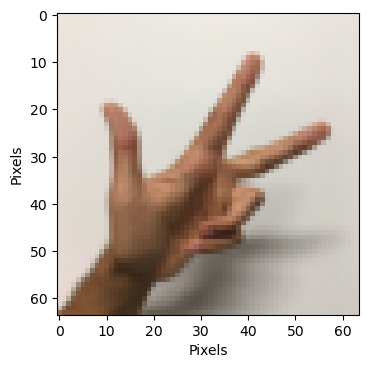

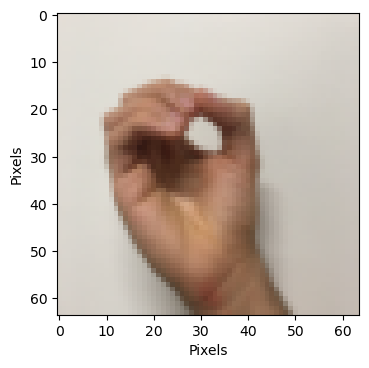

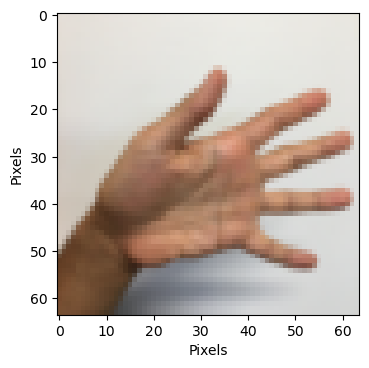

In [87]:
for i in range(3):
    fig = plt.figure(dpi=100)
    plt.imshow(x_test[random.randint(0, x_test.shape[0]-1)][:])
    plt.ylabel("Pixels")
    plt.xlabel("Pixels")
    plt.show()

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes = 6)
y_train.shape

(1080, 6)

In [89]:
x_test

array([[[[231, 223, 212],
         [231, 224, 212],
         [232, 224, 213],
         ...,
         [219, 209, 195],
         [216, 207, 192],
         [214, 204, 188]],

        [[231, 223, 212],
         [231, 224, 212],
         [231, 224, 212],
         ...,
         [219, 210, 196],
         [216, 207, 192],
         [213, 204, 188]],

        [[231, 223, 211],
         [230, 224, 212],
         [230, 224, 212],
         ...,
         [219, 209, 197],
         [216, 207, 193],
         [214, 205, 189]],

        ...,

        [[194, 185, 172],
         [194, 185, 173],
         [193, 184, 172],
         ...,
         [ 32,  23,  31],
         [ 18,  18,  25],
         [ 14,  15,  21]],

        [[193, 184, 171],
         [193, 184, 172],
         [193, 184, 172],
         ...,
         [ 70,  16,  27],
         [ 27,  19,  27],
         [ 16,  18,  23]],

        [[192, 184, 171],
         [192, 183, 172],
         [192, 183, 171],
         ...,
         [ 91,  11,  22],
        

# Neural Network

**Building The Model**

In [90]:
weight_decay = 0.0001

num_classes = 6

model = Sequential()

model.add(Conv2D(32, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(64,64,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(64, activation="linear"))
model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

**Configurating The Model**

In [91]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        16416     
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)       

**Training The Model**

In [92]:
training_history = model.fit(x = x_train,y = y_train, batch_size=64,epochs = 8)

Epoch 1/8
17/17 [==============================] - 38s 2s/step - loss: 2.6689 - accuracy: 0.2228
Epoch 2/8
17/17 [==============================] - 36s 2s/step - loss: 1.2013 - accuracy: 0.5439
Epoch 3/8
17/17 [==============================] - 36s 2s/step - loss: 0.7920 - accuracy: 0.7002
Epoch 4/8
17/17 [==============================] - 34s 2s/step - loss: 0.6009 - accuracy: 0.8040
Epoch 5/8
17/17 [==============================] - 34s 2s/step - loss: 0.5555 - accuracy: 0.7997
Epoch 6/8
17/17 [==============================] - 34s 2s/step - loss: 0.3916 - accuracy: 0.8602
Epoch 7/8
17/17 [==============================] - 34s 2s/step - loss: 0.3182 - accuracy: 0.8933
Epoch 8/8
17/17 [==============================] - 34s 2s/step - loss: 0.2489 - accuracy: 0.9245


**List All Data in History**

In [93]:
training_history.history.keys()

dict_keys(['loss', 'accuracy'])

**Summarize History For Model**

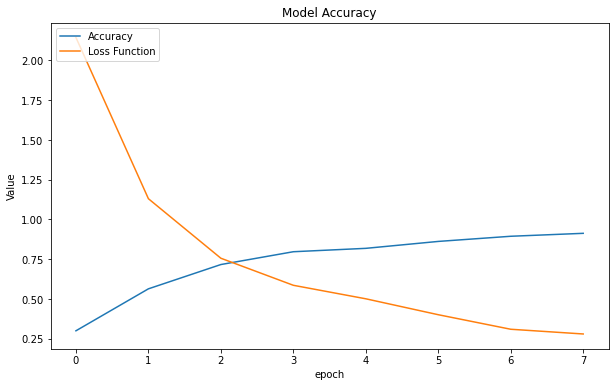

In [94]:
fig = plt.figure(figsize = (10,6))
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss Function'], loc='upper left')
plt.show()

**Predictions of Train Data Set**

In [95]:
predict_train = np.argmax(model.predict(x_train), axis=-1)
print(predict_train)

[3 3 3 ... 3 3 3]


**Predictions of Test Data Set**

In [96]:
predict_test = np.argmax(model.predict(x_test), axis=-1)
predict_test

array([3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

**Save Results in submisson.csv**

In [97]:
result = predict_test.round(0)

file = open("submission.csv", "w")
file.write("index,y\n")
    
for id, pred in enumerate(result):
    file.write("{},{}\n".format(id, round(pred)))
    print(id, round(pred))
file.close()

0 3
1 3
2 3
3 3
4 3
5 3
6 5
7 5
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 5
16 3
17 3
18 3
19 3
20 5
21 3
22 3
23 3
24 3
25 3
26 3
27 3
28 3
29 3
30 3
31 3
32 3
33 5
34 3
35 3
36 3
37 3
38 3
39 3
40 5
41 3
42 3
43 3
44 3
45 3
46 3
47 3
48 3
49 3
50 0
51 0
52 3
53 3
54 3
55 3
56 3
57 3
58 3
59 3
60 3
61 3
62 3
63 3
64 3
65 3
66 3
67 3
68 3
69 3
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 3
78 3
79 3
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 3
89 3
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 5
98 3
99 3
100 3
101 3
102 5
103 3
104 3
105 3
106 3
107 5
108 3
109 3
110 3
111 3
112 3
113 3
114 3
115 3
116 3
117 3
118 3
119 3
